In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"
num_classes = 10

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 837 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
Found 97 images belonging to 10 classes.


In [5]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*9*9, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(input_shape=[28,28,32]),

IndentationError: unexpected indent (1720692217.py, line 16)

In [6]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(6, (5,5), activation='relu', padding='same', input_shape=[224,224,3]),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(16, (5,5), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(input_shape=[28,28,32]),
  tf.keras.layers.Dense(120, activation="relu"),
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
15/26 [================>.............] - ETA: 20s - loss: 2.3243 - accuracy: 0.0979

c:\Users\bjwy\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 57s 2s/step - loss: 2.2920 - accuracy: 0.1267 - val_loss: 2.0980 - val_accuracy: 0.2292
Epoch 2/10
26/26 [==============================] - 57s 2s/step - loss: 1.9277 - accuracy: 0.3143 - val_loss: 1.4808 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 59s 2s/step - loss: 1.5922 - accuracy: 0.4509 - val_loss: 1.2493 - val_accuracy: 0.5417
Epoch 4/10
26/26 [==============================] - 68s 3s/step - loss: 1.4062 - accuracy: 0.5068 - val_loss: 0.9605 - val_accuracy: 0.6771
Epoch 5/10
26/26 [==============================] - 68s 3s/step - loss: 1.2668 - accuracy: 0.5602 - val_loss: 1.1294 - val_accuracy: 0.5938
Epoch 6/10
26/26 [==============================] - 67s 3s/step - loss: 1.2363 - accuracy: 0.5652 - val_loss: 0.8970 - val_accuracy: 0.7188
Epoch 7/10
26/26 [==============================] - 68s 3s/step - loss: 1.1175 - accuracy: 0.6062 - val_loss: 0.6742 - val_accuracy: 0.7500
Epoch 8/10
26/26 [=============

In [10]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.292000,0.126708,2.098029,0.229167
1,1.927661,0.314286,1.480830,0.500000
2,1.592211,0.450932,1.249321,0.541667
3,1.406225,0.506832,0.960505,0.677083
4,1.266844,0.560248,1.129413,0.593750
5,1.236322,0.565217,0.896977,0.718750
6,1.117451,0.606211,0.674213,0.750000
7,0.994033,0.649689,0.599473,0.802083
8,0.925636,0.675776,0.761332,0.750000
9,1.046014,0.640994,0.630950,0.770833


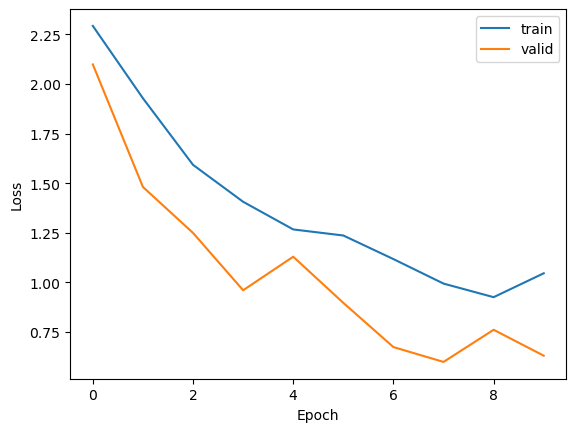

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

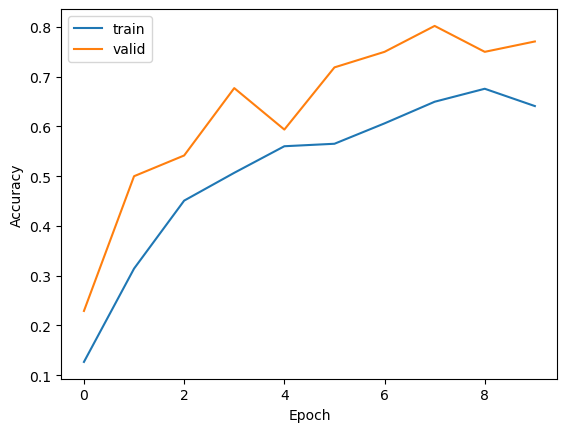

In [12]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [13]:
preds = model.predict(test_generator)

4/4 [==============================] - 6s 2s/step


In [14]:
y_pred = np.argmax(preds, axis=1)

In [15]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : grapes
3 : kiwi
4 : mango
5 : orange
6 : pear
7 : pineapple
8 : pomegranate
9 : watermelon


In [16]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "grapes",
    3 : "kiwi",
    4 : "mango",
    5 : "orange",
    6 : "pear",
    7 : "pineapple",
    8 : "pomegranate",
    9 : "watermelon"
}

In [17]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [18]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       0.30      0.60      0.40         5
      banana       0.78      0.88      0.82         8
      grapes       0.80      1.00      0.89         8
        kiwi       1.00      0.77      0.87        13
       mango       0.50      1.00      0.67         5
      orange       1.00      0.67      0.80        15
        pear       0.90      0.82      0.86        11
   pineapple       1.00      0.83      0.91        12
 pomegranate       1.00      0.59      0.74        17
  watermelon       0.40      0.80      0.53         5

    accuracy                           0.77        99
   macro avg       0.77      0.80      0.75        99
weighted avg       0.86      0.77      0.79        99

